In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import database_credentials as dc

In [2]:
# Database credentials
postgres_user = dc.user()
postgres_pw = dc.pw()
postgres_host = dc.host()
postgres_port = dc.port()
postgres_db = dc.db()

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

In [3]:
# creating a table for orders created
sql = '''
SELECT carrier_id, guid, id, date(created_at)
FROM ctms_db_public.msd_order
WHERE date(created_at) >= date(current_date - interval '28 days')
AND date(created_at) < date(current_date)
AND is_for_demo = False
'''
orders = pd.read_sql_query(sql, con=engine)
orders = orders.rename(columns={'id': 'order_id', 'guid': 'order_guid', 'date': 'created_at'})
orders

,carrier_id,order_guid,order_id,created_at
0,18514.0,37d5ae71-7bdd-47e0-9b26-8f66eb59258d,7842443,2020-12-22
1,18514.0,a9b62439-5425-4825-8f8d-d7b72cde6de4,7842491,2020-12-22
2,30821.0,061db646-e320-4f0f-8e03-61a1773ab597,7842408,2020-12-22
3,18514.0,8f3422f2-6e44-4903-9ab4-90e5af8e91e1,7842520,2020-12-22
4,23176.0,2cef3251-cfa5-4c7e-a721-6eba75dd8454,7842623,2020-12-22
...,...,...,...,...
179942,25308.0,a00f9610-cfff-4e99-a79a-49043db86d38,8025334,2021-01-18
179943,44514.0,c93f1d85-f1e2-4a8e-88bb-43a1c9afa375,8025350,2021-01-18
179944,37821.0,41b27100-2fc9-4708-b344-39a2e36d1343,8025366,2021-01-18
179945,22333.0,a8c4e381-7a40-4e08-8ccb-d4a377eecde6,8025382,2021-01-18


In [4]:
# creating a table for carriers
sql = '''
SELECT name, guid, id
FROM ctms_db_public.msd_carrier
WHERE test_account = False
'''
carriers = pd.read_sql_query(sql, con=engine)
carriers = carriers.rename(columns={'id': 'carrier_id', 'guid': 'carrier_guid', 'name': 'carrier_name'})
carriers

,carrier_name,carrier_guid,carrier_id
0,ayman,71918a40-f1df-4b52-b925-129ed39183f1,7
1,CN2,c623837b-04ee-4cf7-a44c-bca993c4d057,16
2,Transcontinental Express LLC,e835ef60-4200-4863-916a-0eed5bd18f93,25
3,Sifuentes Auto Transport,0a142cbc-cc41-42be-96cc-9bee4dde0929,29
4,A1 USA Express,e97661bf-33fa-4b77-b4b4-23c960e54da8,37
...,...,...,...
40888,AXIS TRANSPORTATION AND LOGISTICS LLC,247627df-ba58-4e8d-8de7-0a1b27324362,39771
40889,TRANSPORTING INVOICE,ee44f70f-3ca3-44a9-98b0-8e2281994b28,1861
40890,Suffy Transport,cdb6346e-1ba1-42a8-a9c3-e7bf2fb9a5d6,20694
40891,ALL AMERICAN RV SERVICES LLC,cccd264d-7453-4fbc-b76f-2074c73d5134,32349


In [5]:
# Creating a table with all drivers
sql = '''
SELECT genericuser_ptr_id, carrier_id, guid
FROM ctms_db_public.msd_driver
WHERE is_suspended = False
'''
drivers = pd.read_sql_query(sql, con=engine)
drivers = drivers.rename(columns={'guid': 'driver_guid'})
drivers

,genericuser_ptr_id,carrier_id,driver_guid
0,27,5478,4d7b7eb2-342c-4712-b3a9-573b2c47806b
1,77,5478,19bb361d-b9ba-4216-98cb-615bf8fc60a1
2,95,36,6fd348b4-7549-4377-a5e0-1c84494e0723
3,111,49,2e3710b3-9c35-41db-942e-ae83c7199218
4,129,5478,e0f4ea96-c069-4219-a2c4-671f29f5deb7
...,...,...,...
62970,84478,34878,fadba91f-a9ef-4968-a47e-dc5371c2a036
62971,84761,166,8eb7ddc1-3489-4c30-8128-9993d0072b7d
62972,84975,13642,62d38c0d-4afd-43e0-ac45-3411bd388114
62973,85358,2305,2c220ce5-1228-427f-8fde-b3e7c3ffd02e


In [6]:
# Joining carrier table with driver table
drivers_with_carrier_guid = drivers.merge(carriers, how='left',
                                          left_on='carrier_id', right_on='carrier_id')
drivers_with_carrier_guid

,genericuser_ptr_id,carrier_id,driver_guid,carrier_name,carrier_guid
0,27,5478,4d7b7eb2-342c-4712-b3a9-573b2c47806b,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
1,77,5478,19bb361d-b9ba-4216-98cb-615bf8fc60a1,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
2,95,36,6fd348b4-7549-4377-a5e0-1c84494e0723,Pegasus auto transport,a850fd2c-6a40-4cbf-a149-3e9971654e31
3,111,49,2e3710b3-9c35-41db-942e-ae83c7199218,Jeffries Transport Services,c1d94c53-2803-4fe5-b9c9-8df3a0a58670
4,129,5478,e0f4ea96-c069-4219-a2c4-671f29f5deb7,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
...,...,...,...,...,...
62970,84478,34878,fadba91f-a9ef-4968-a47e-dc5371c2a036,RED WHEELS INC,00bf92bb-7066-4ae0-8709-e2b292298f67
62971,84761,166,8eb7ddc1-3489-4c30-8128-9993d0072b7d,UZ Auto Trans Inc,3da07a51-afb4-4efe-8be0-29a823c2fc8f
62972,84975,13642,62d38c0d-4afd-43e0-ac45-3411bd388114,Automotive Resource Management,068a1a32-c826-42a1-9a3b-7be55bb2add0
62973,85358,2305,2c220ce5-1228-427f-8fde-b3e7c3ffd02e,"Extra Mile Transport, Inc",411834a1-ddbe-49c8-970a-de52874a42ba


In [7]:
# findind the unique number of activated drivers for each carrier
active_driver_count = (drivers_with_carrier_guid.groupby(['carrier_guid', 'carrier_id', 'carrier_name'])
                                                        [['genericuser_ptr_id']].nunique())
active_driver_count.reset_index(inplace=True)
active_driver_count = active_driver_count.rename(columns={'genericuser_ptr_id': 'activated_drivers'})
active_driver_count

,carrier_guid,carrier_id,carrier_name,activated_drivers
0,000243e7-afae-455a-8e61-5c691916f39e,31952,PERFECT SERVICES LLC,1
1,0004758e-daf4-4d3f-8257-be49db385d8e,1198,Flete,1
2,000acb9e-e4bb-4cff-a5b3-3bedcf05babf,29808,R-MICHAEL ENT LLC,1
3,000b7030-5bfc-4c95-8627-df29412347ff,43133,MACROD TOWING LLC,1
4,000b8e63-986b-4bae-befe-22481e2bfc9c,32277,AB TRANSPORT SERVICE,1
...,...,...,...,...
38479,fff8e9ba-cbcd-4bf7-8f92-b00fba5ba543,9501,Alpha Transport,1
38480,fffa8e6a-3943-47f5-bc00-52f59d9cd0c6,28014,NEAGU INC,1
38481,fffb578c-7297-4ade-996d-eef9aed6c22c,9916,SAM TRANSPORT LLC,1
38482,ffff3737-7524-40a4-b225-a8832c96bf91,6038,Gshsh,1


In [8]:
#Joining carrier table with order table

orders_w_driver_count = orders.merge(active_driver_count, left_on='carrier_id', right_on='carrier_id')
orders_w_driver_count

,carrier_id,order_guid,order_id,created_at,carrier_guid,carrier_name,activated_drivers
0,18514.0,37d5ae71-7bdd-47e0-9b26-8f66eb59258d,7842443,2020-12-22,f56e19fa-c5b9-4470-b01e-64caf02ff59a,jca transport services,1
1,18514.0,a9b62439-5425-4825-8f8d-d7b72cde6de4,7842491,2020-12-22,f56e19fa-c5b9-4470-b01e-64caf02ff59a,jca transport services,1
2,18514.0,8f3422f2-6e44-4903-9ab4-90e5af8e91e1,7842520,2020-12-22,f56e19fa-c5b9-4470-b01e-64caf02ff59a,jca transport services,1
3,18514.0,e9757b93-9e16-4856-85eb-ca798e111bcf,7842645,2020-12-22,f56e19fa-c5b9-4470-b01e-64caf02ff59a,jca transport services,1
4,18514.0,03ea68c1-7267-499d-93ad-9ce39b399416,7842604,2020-12-22,f56e19fa-c5b9-4470-b01e-64caf02ff59a,jca transport services,1
...,...,...,...,...,...,...,...
176874,21960.0,701ef09c-be14-4a00-95ba-488ae4c5f778,8009209,2021-01-18,ac06f476-448a-4bc9-9d36-3037f55d3891,Arizona Auto Relocation,7
176875,44206.0,b42ad7ff-e044-42cf-bb45-6d855b550af2,7975401,2021-01-12,f6084bb2-47aa-4fd5-8131-71fe6fca30e7,LUVA'S AUTO TRANSPORT,1
176876,37906.0,1ca3377c-f6b6-425b-a71c-ff9d157f1dca,8022415,2021-01-18,a012c3be-8180-402b-96fd-e8f0d36d6fed,CUJO TRANSPORT & LOGISTICS CORP,1
176877,26214.0,f1c3e6d1-bd43-4d99-9681-913a6fa164e2,8025401,2021-01-18,46c89ef7-eb4b-4c8b-9603-c885de4809de,DOUBLE T HAULING LLC,1


In [9]:
# getting only "snall carriers"
orders_w_driver_count = orders_w_driver_count[orders_w_driver_count['activated_drivers'] == 1]
result = orders_w_driver_count.groupby(['carrier_id', 'carrier_guid']).nunique()[['created_at']]
result.reset_index(inplace=True)
result = result.rename(columns={'created_at': 'unique_days_creating_orders'})
result

,carrier_id,carrier_guid,unique_days_creating_orders
0,75.0,22fa8f2e-628c-4e26-aeef-f7f3d0cf78ec,3
1,88.0,af54a172-e9d3-4c23-8696-de0c303bfb23,17
2,188.0,abdc6ddb-965b-4ec8-9c5c-39ab7f41cbca,1
3,241.0,66b46fe9-fc02-46b5-81cc-a222607eb093,10
4,249.0,1c1f34e9-69fe-4cd6-be2c-fe59e22ae10b,9
...,...,...,...
2801,44488.0,d40e0558-aee8-4b88-ae05-467cf27246a1,1
2802,44497.0,2a6c66a2-7fcf-429a-8e90-480115bdfd06,1
2803,44501.0,3ca9726f-a286-4873-a35d-4b49ab85002b,1
2804,44505.0,ec7f6cc1-4b98-4392-9841-c7c22cd59b7a,1


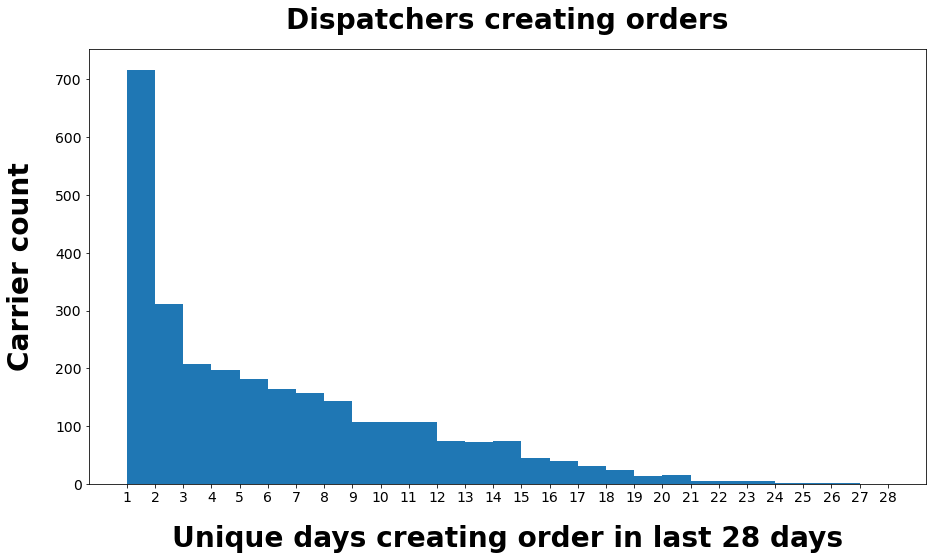

In [10]:
# histogram of unique days of creating orders
plt.figure(figsize=(15,8))
plt.hist(result['unique_days_creating_orders'], bins=np.arange(1, 29))
plt.xticks(np.arange(1, 29), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Unique days creating order in last 28 days', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('Carrier count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('Dispatchers creating orders', fontsize=28, fontweight='bold', pad=20)
plt.show()

# Now let's segment paid users and free users

In [11]:
# creating a table for braintree subscriptions
sql = '''
DROP TABLE IF EXISTS #carrier_with_latest_sub_date
;
SELECT 
carrier_id
,max(created_at) AS last_sub
INTO #carrier_with_latest_sub_date
FROM ctms_db_public.billing_braintreesubscription
WHERE braintree_subscription_status IN ('Active', 'Past Due', 'Pending')
GROUP BY carrier_id
;
SELECT 
#carrier_with_latest_sub_date.carrier_id
,last_sub
,braintree_subscription_status
FROM #carrier_with_latest_sub_date
JOIN ctms_db_public.billing_braintreesubscription
ON #carrier_with_latest_sub_date.carrier_id = billing_braintreesubscription.carrier_id
AND #carrier_with_latest_sub_date.last_sub = billing_braintreesubscription.created_at
WHERE billing_braintreesubscription.braintree_subscription_status IN ('Active', 'Past Due', 'Pending')
;
'''
braintree_subs = pd.read_sql_query(sql, con=engine)
braintree_subs

,carrier_id,last_sub,braintree_subscription_status
0,2978,2016-11-26 09:21:34.937541,Active
1,5164,2017-01-05 22:15:51.921429,Active
2,3109,2016-11-26 09:21:33.283626,Active
3,8280,2017-06-17 15:20:29.527819,Active
4,831,2016-11-26 09:21:32.012823,Active
...,...,...,...
2865,37735,2021-01-18 15:41:15.724377,Active
2866,26442,2021-01-18 18:44:02.175590,Active
2867,40915,2021-01-18 20:07:54.276443,Active
2868,7241,2021-01-18 20:40:43.572320,Active


In [12]:
# joining carriers with braintree table

braintree_with_carriers = braintree_subs.merge(carriers, left_on='carrier_id', right_on='carrier_id')
braintree_with_carriers

,carrier_id,last_sub,braintree_subscription_status,carrier_name,carrier_guid
0,2978,2016-11-26 09:21:34.937541,Active,AU-THENTIC INDUSTRIES LLC,1e1366e5-0c67-4019-bd33-e255416c7df7
1,5164,2017-01-05 22:15:51.921429,Active,Capital Trucking LLC,255749b3-8b17-421a-a3ed-353ca3472495
2,3109,2016-11-26 09:21:33.283626,Active,MEI Transportation Services Inc,49cdf08d-56ea-48c6-87d1-91515bf31639
3,8280,2017-06-17 15:20:29.527819,Active,ZPA Incorporated,ba962dbd-1e32-4caf-83e9-59db46983d6a
4,831,2016-11-26 09:21:32.012823,Active,Born Again Hauling,6f3b99e9-ad63-4ca1-abae-44b6c7cd0a14
...,...,...,...,...,...
2865,37735,2021-01-18 15:41:15.724377,Active,BLACK EAGLE TRANSPORTATION INC,3ff0ea7b-bfda-414a-8231-01e31ff027c2
2866,26442,2021-01-18 18:44:02.175590,Active,TRINITY DRIVE-AWAY LLC,782d3b6f-6ce2-47e2-984b-9eefb50096c9
2867,40915,2021-01-18 20:07:54.276443,Active,2517 INC,2d596f76-0137-4a06-b14b-556bad55f2e4
2868,7241,2021-01-18 20:40:43.572320,Active,DBN Trans Inc.,b81b0e8c-b9ec-4d73-85b8-ea3d10d7e962


# Paid users

In [13]:
result_paid_users = orders_w_driver_count.merge(braintree_with_carriers,
                                                left_on=['carrier_guid', 'carrier_id'],
                                                right_on=['carrier_guid', 'carrier_id'])
result_paid_users = result_paid_users.groupby(['carrier_id', 'carrier_guid']).nunique()
result_paid_users.reset_index(inplace=True)
result_paid_users = result_paid_users.rename(columns={'created_at': 'unique_days_creating_order'})
result_paid_users

,carrier_id,carrier_guid,order_guid,order_id,unique_days_creating_order,carrier_name_x,activated_drivers,last_sub,braintree_subscription_status,carrier_name_y
0,299.0,10fbe3e3-1c61-4233-ba24-b20ae993c18d,66,66,19,1,1,1,1,1
1,404.0,59c63762-18c9-4dbe-8ae4-559c59692d5e,34,34,15,1,1,1,1,1
2,942.0,3c45c8e3-5e72-4594-8111-b8ab0cac9174,11,11,6,1,1,1,1,1
3,1063.0,02ce63bc-860a-4624-ae5e-31fdefa7cb26,7,7,5,1,1,1,1,1
4,1140.0,7d95b590-246e-490a-ad60-8f9121f55cd6,10,10,7,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
728,43968.0,34620dc9-f6b7-4812-854d-9980cfa98218,23,23,5,1,1,1,1,1
729,44006.0,c29729d8-a5ad-4026-bbf7-a35d81f2c0f4,15,15,2,1,1,1,1,1
730,44020.0,4faaa428-11ff-4830-b55d-84afd85eef95,14,14,4,1,1,1,1,1
731,44026.0,e61e8322-6fe9-4e3a-9f67-0f84a2c4cd0e,14,14,5,1,1,1,1,1


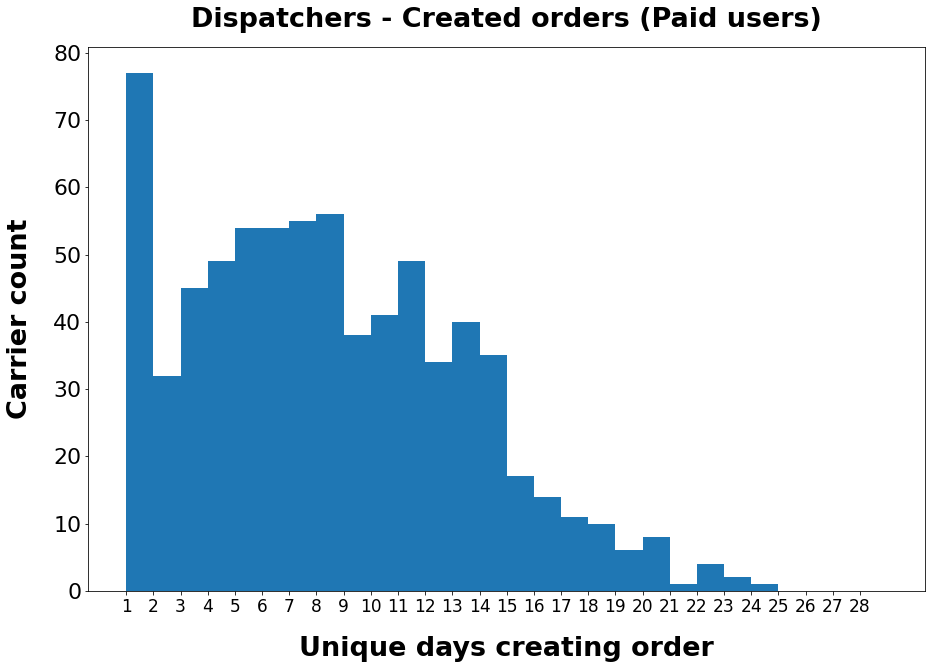

In [14]:
# histogram of unique orders created in last 28 days (paid users)
plt.figure(figsize=(15,10))
plt.hist(result_paid_users['unique_days_creating_order'], bins=np.arange(1, 30))
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=22)
plt.xlabel('Unique days creating order', fontsize=27, fontweight='bold', labelpad=20)
plt.ylabel('Carrier count', fontsize=27, fontweight='bold', labelpad=20)
plt.title('Dispatchers - Created orders (Paid users)', fontsize=27, fontweight='bold', pad=20)
plt.show()

# Free users

In [15]:
orders_free_users = orders_w_driver_count.merge(braintree_with_carriers, how='left',
                                                left_on=['carrier_guid', 'carrier_id'],
                                                right_on=['carrier_guid', 'carrier_id'])
# free users
free_users = orders_free_users['braintree_subscription_status'].isna() == True
# dropping all paid user rows
orders_free_users = orders_free_users[free_users]
result_free_users = orders_free_users.groupby(['carrier_id', 'carrier_guid']).nunique()
result_free_users.reset_index(inplace=True)
result_free_users = result_free_users.rename(columns={'created_at': 'unique_days_creating_order'})
result_free_users

,carrier_id,carrier_guid,order_guid,order_id,unique_days_creating_order,carrier_name_x,activated_drivers,last_sub,braintree_subscription_status,carrier_name_y
0,75.0,22fa8f2e-628c-4e26-aeef-f7f3d0cf78ec,4,4,3,1,1,0,0,0
1,88.0,af54a172-e9d3-4c23-8696-de0c303bfb23,32,32,17,1,1,0,0,0
2,188.0,abdc6ddb-965b-4ec8-9c5c-39ab7f41cbca,1,1,1,1,1,0,0,0
3,241.0,66b46fe9-fc02-46b5-81cc-a222607eb093,29,29,10,1,1,0,0,0
4,249.0,1c1f34e9-69fe-4cd6-be2c-fe59e22ae10b,17,17,9,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2068,44488.0,d40e0558-aee8-4b88-ae05-467cf27246a1,1,1,1,1,1,0,0,0
2069,44497.0,2a6c66a2-7fcf-429a-8e90-480115bdfd06,1,1,1,1,1,0,0,0
2070,44501.0,3ca9726f-a286-4873-a35d-4b49ab85002b,9,9,1,1,1,0,0,0
2071,44505.0,ec7f6cc1-4b98-4392-9841-c7c22cd59b7a,4,4,1,1,1,0,0,0


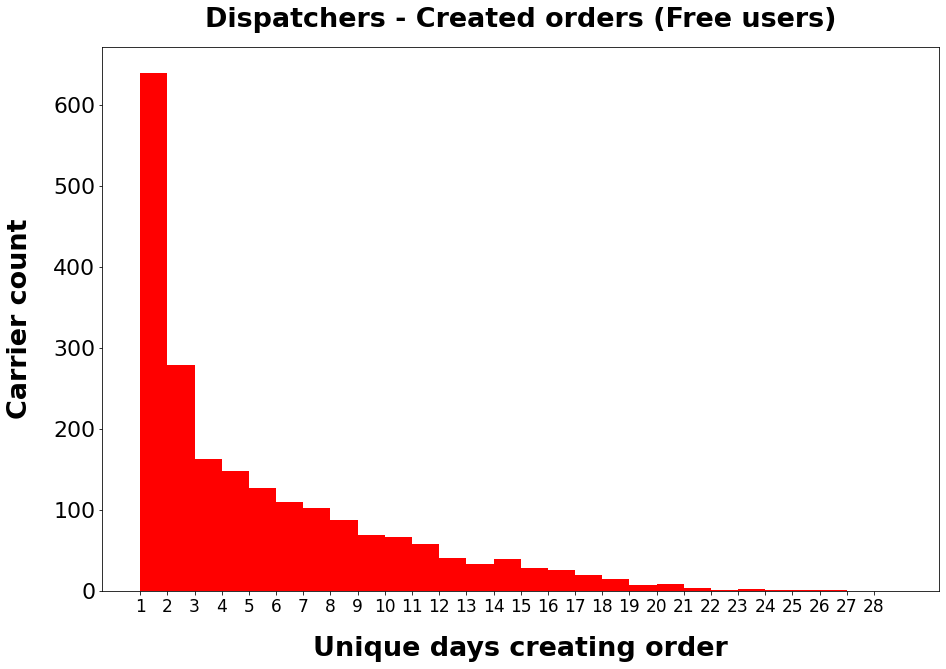

In [16]:
# histogram of unique orders created in last 28 days (paid users)
plt.figure(figsize=(15,10))
plt.hist(result_free_users['unique_days_creating_order'], bins=np.arange(1, 30), color='red')
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=22)
plt.xlabel('Unique days creating order', fontsize=27, fontweight='bold', labelpad=20)
plt.ylabel('Carrier count', fontsize=27, fontweight='bold', labelpad=20)
plt.title('Dispatchers - Created orders (Free users)', fontsize=27, fontweight='bold', pad=20)
plt.show()

# Bar graph for paid and free users

In [17]:
total_paid_carriers_for_days_active = []

for i in range(1,29):
    paid_active_carrier_count = (result_paid_users[result_paid_users['unique_days_creating_order'] >= i]
                           .groupby('unique_days_creating_order').count()['carrier_guid'].sum())
    
    total_paid_carriers_for_days_active.append(paid_active_carrier_count)
    


total_free_carriers_for_days_active = []

for i in range(1,29):
    free_active_carrier_count = (result_free_users[result_free_users['unique_days_creating_order'] >= i]
                           .groupby('unique_days_creating_order').count()['carrier_guid'].sum())
    
    total_free_carriers_for_days_active.append(free_active_carrier_count)

In [18]:
paid_active_carriers = pd.DataFrame()
paid_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
paid_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
paid_active_carriers['total_carriers_at_least_this_active'] = total_paid_carriers_for_days_active
paid_active_carriers['total_percentage_active'] = round(100*paid_active_carriers['total_carriers_at_least_this_active']
                                                       /len(result_paid_users))
paid_active_carriers['total_percentage_dormant'] = 100 - paid_active_carriers['total_percentage_active']


free_active_carriers = pd.DataFrame()
free_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
free_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
free_active_carriers['total_carriers_at_least_this_active'] = total_free_carriers_for_days_active
free_active_carriers['total_percentage_active'] = round(100*free_active_carriers['total_carriers_at_least_this_active']
                                                       /len(result_free_users))
free_active_carriers['total_percentage_dormant'] = 100 - free_active_carriers['total_percentage_active']

In [19]:
def paid_vs_non_paid(paid_metric_definition, non_paid_metric_definition):
    plt.figure(figsize=(13,11))
    plt.subplots_adjust(wspace=.9)
    
    plt.subplot(1,2,1)
    paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[paid_active_carriers.loc[paid_metric_definition, 'total_carriers_at_least_this_active'],
                           (paid_active_carriers.loc[1, 'total_carriers_at_least_this_active'] - 
                            paid_active_carriers.loc[paid_metric_definition, 'total_carriers_at_least_this_active'])],
                        palette='muted')
    for p in paid_graph.patches:
        paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        paid_graph.annotate('{}%'.format(round(100*p.get_height()/paid_active_carriers.loc[1, 'total_carriers_at_least_this_active'])), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    plt.ylabel('Carrier Count', fontsize=28, fontweight='bold', labelpad=20)
    title = '''If {} out of 28 days
created load
(paid users)'''.format(paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)

        
    
    plt.subplot(1,2,2)
    non_paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[free_active_carriers.loc[non_paid_metric_definition, 'total_carriers_at_least_this_active'],
                           (free_active_carriers.loc[1, 'total_carriers_at_least_this_active'] - 
                            free_active_carriers.loc[non_paid_metric_definition, 'total_carriers_at_least_this_active'])],
                        palette='muted')
    for p in non_paid_graph.patches:
        non_paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        non_paid_graph.annotate('{}%'.format(round(100*p.get_height()/free_active_carriers.loc[1, 'total_carriers_at_least_this_active'])), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    title = '''If {} out of 28 days
created load
(free users)'''.format(non_paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)
    plt.show()

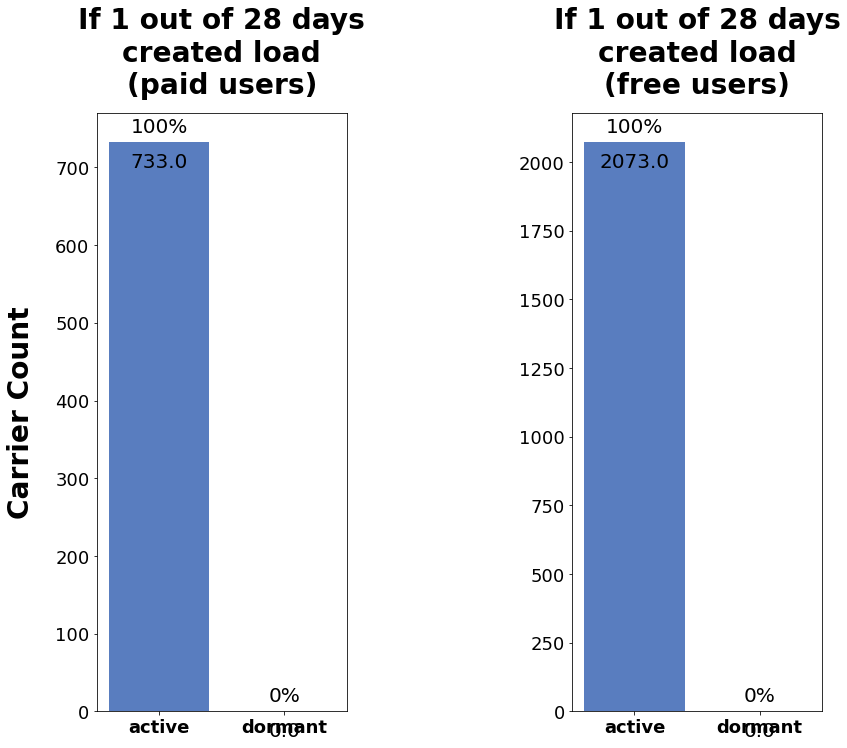

In [20]:
paid_vs_non_paid(1, 1)

# Create bar charts with '0 frequency' users

In [21]:
all_paid_small_carriers = braintree_with_carriers
all_paid_small_carriers = all_paid_small_carriers.merge(active_driver_count,
                                                    left_on=['carrier_guid', 'carrier_id'],
                                                    right_on=['carrier_guid', 'carrier_id'])
# getting only small carriers
all_paid_small_carriers = all_paid_small_carriers[all_paid_small_carriers['activated_drivers'] == 1]
all_paid_small_carriers

,carrier_id,last_sub,braintree_subscription_status,carrier_name_x,carrier_guid,carrier_name_y,activated_drivers
8,404,2017-12-14 13:55:17.775118,Active,Sam Motors Corp,59c63762-18c9-4dbe-8ae4-559c59692d5e,Sam Motors Corp,1
11,11756,2017-10-31 18:57:07.452486,Active,Garland Logistics,e4e4fe1f-4940-4268-a997-baad77791952,Garland Logistics,1
15,2735,2016-11-26 09:21:30.766264,Active,"S&S Tow & Transport, LLC",5f334eaa-55b0-4697-9630-0840f8254182,"S&S Tow & Transport, LLC",1
18,11671,2017-10-26 03:34:17.800101,Active,Wiggle Tow Transport LLC,2ffb480a-4911-41bc-8b16-8068a5141459,Wiggle Tow Transport LLC,1
22,1250,2018-07-02 13:39:41.026321,Active,Circle S Transport LLC,140f19d7-a266-48ab-8fb7-a057eda3e8be,Circle S Transport LLC,1
...,...,...,...,...,...,...,...
2796,41136,2020-10-13 20:11:22.490135,Past Due,RELIABLE TRANSPORTATION|RELIABLE CAR HAULING,41cad6ff-51bd-4d0e-8cde-a4ff25f7ef82,RELIABLE TRANSPORTATION|RELIABLE CAR HAULING,1
2798,38930,2020-07-30 07:55:54.648072,Past Due,NGU AUTO LLC,784c0b98-8d93-4e0a-9e62-5d2f0dfc66ae,NGU AUTO LLC,1
2799,40104,2020-09-10 15:01:04.866965,Past Due,M&T TRANSPORTATION SERVICES LLC,0a689ebd-9d20-4fb8-af92-0ea796563115,M&T TRANSPORTATION SERVICES LLC,1
2800,38346,2020-07-06 15:31:26.666242,Past Due,E&I TRANSPORTATION LLC,07d072df-9d6d-40d2-8924-5abef9c058c2,E&I TRANSPORTATION LLC,1


In [22]:
all_free_small_carriers =  carriers.merge(braintree_with_carriers, how='left',
                                        left_on='carrier_guid', right_on='carrier_guid')

# getting all free users
non_payers = all_free_small_carriers['braintree_subscription_status'].isna() == True
# #dropping all rows with paid users
all_free_small_carriers = all_free_small_carriers[non_payers]
# getting only small carriers 
all_free_small_carriers = all_free_small_carriers.merge(active_driver_count,
                                                    left_on='carrier_guid',
                                                    right_on='carrier_guid')
all_free_small_carriers = all_free_small_carriers[all_free_small_carriers['activated_drivers'] == 1]
all_free_small_carriers

,carrier_name_x,carrier_guid,carrier_id_x,carrier_id_y,last_sub,braintree_subscription_status,carrier_name_y,carrier_id,carrier_name,activated_drivers
0,Transcontinental Express LLC,e835ef60-4200-4863-916a-0eed5bd18f93,25,NaN,NaT,NaN,NaN,25,Transcontinental Express LLC,1
1,Sifuentes Auto Transport,0a142cbc-cc41-42be-96cc-9bee4dde0929,29,NaN,NaT,NaN,NaN,29,Sifuentes Auto Transport,1
2,A1 USA Express,e97661bf-33fa-4b77-b4b4-23c960e54da8,37,NaN,NaT,NaN,NaN,37,A1 USA Express,1
3,GNE Auto Transport,22debc9b-010c-48e2-9ca8-4bafa8577968,57,NaN,NaT,NaN,NaN,57,GNE Auto Transport,1
4,Manny's Transport & Towing Inc,279047dd-9dbe-41cf-95dd-dae24d18c398,113,NaN,NaT,NaN,NaN,113,Manny's Transport & Towing Inc,1
...,...,...,...,...,...,...,...,...,...,...
35664,ROADRUNNERS AUTO TRANSPORT LLC,98884423-1aa9-4421-ae3f-6404082bc905,38683,NaN,NaT,NaN,NaN,38683,ROADRUNNERS AUTO TRANSPORT LLC,1
35669,BATTLE BORN TRANSPORTING LLC,1e4cc511-ef6f-4173-b2f3-92b1b6935b38,42902,NaN,NaT,NaN,NaN,42902,BATTLE BORN TRANSPORTING LLC,1
35670,APEX TRANSPORTATION LLC,0affc3c7-741c-4e3c-af3b-14d475b567aa,34451,NaN,NaT,NaN,NaN,34451,APEX TRANSPORTATION LLC,1
35673,ACTION TRANSPORT SERVICE LLC,427a843f-083d-45be-9c57-04cdcad14ce8,26082,NaN,NaT,NaN,NaN,26082,ACTION TRANSPORT SERVICE LLC,1


In [23]:
paid_active_carriers = pd.DataFrame()
paid_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
paid_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
paid_active_carriers['total_carriers_at_least_this_active'] = total_paid_carriers_for_days_active
paid_active_carriers['total_dormant_carriers'] = ([len(all_paid_small_carriers) - total_paid_carriers_for_days_active[x]
                                                 for x in range(len(total_paid_carriers_for_days_active))]) 
paid_active_carriers['total_percentage_active'] = round(100*paid_active_carriers['total_carriers_at_least_this_active']
                                                      /len(all_paid_small_carriers))
paid_active_carriers['total_percentage_dormant'] = 100 - paid_active_carriers['total_percentage_active']


free_active_carriers = pd.DataFrame()
free_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
free_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
free_active_carriers['total_carriers_at_least_this_active'] = total_free_carriers_for_days_active
free_active_carriers['total_dormant_carriers'] = ([len(all_free_small_carriers) - total_free_carriers_for_days_active[x]
                                                 for x in range(len(total_free_carriers_for_days_active))])
free_active_carriers['total_percentage_active'] = round(100*free_active_carriers['total_carriers_at_least_this_active']
                                                      /len(all_free_small_carriers))
free_active_carriers['total_percentage_dormant'] = 100 - free_active_carriers['total_percentage_active']

In [24]:
def all_users(paid_metric_definition, free_metric_definition):
    plt.figure(figsize=(13,11))
    plt.subplots_adjust(wspace=.9)
    
    plt.subplot(1,2,1)
    paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[paid_active_carriers.loc[paid_metric_definition, 'total_carriers_at_least_this_active'],
                           paid_active_carriers.loc[paid_metric_definition, 'total_dormant_carriers']],
                        palette='muted')
    for p in paid_graph.patches:
        paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        paid_graph.annotate('{}%'.format(round(100*p.get_height()/len(all_paid_small_carriers))), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    plt.ylabel('Carrier Count', fontsize=28, fontweight='bold', labelpad=20)
    title = '''If {} out of 28 days
created load
(paid users)'''.format(paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)

        
    
    plt.subplot(1,2,2)
    non_paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[free_active_carriers.loc[free_metric_definition, 'total_carriers_at_least_this_active'], 
                           free_active_carriers.loc[free_metric_definition, 'total_dormant_carriers']],
                        palette='muted')
    for p in non_paid_graph.patches:
        non_paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        non_paid_graph.annotate('{}%'.format(round(100*p.get_height()/len(all_free_small_carriers))), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    title = '''If {} out of 28 days
created load
(free users)'''.format(free_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)
    plt.show()

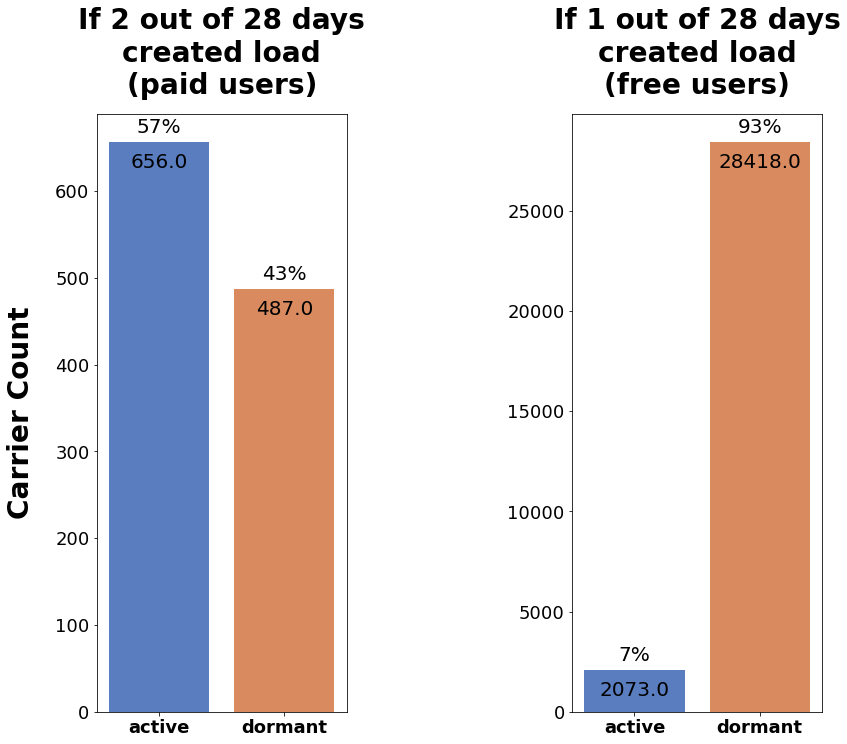

In [25]:
all_users(2,1)